In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

X, y = mnist["data"], mnist["target"]
X.shape
y.shape

import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

y[0]

import numpy as np
y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

y_scores = sgd_clf.decision_function([some_digit])
y_scores
threshold = 0
y_some_digit_pred = (y_scores > threshold)
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method = "decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)
recall_score(y_train_5, y_train_pred_90)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
plot_roc_curve(fpr,tpr)
plt.show()

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method = "predict_proba")
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()
roc_auc_score(y_train_5, y_scores_forest)

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores
np.argmax(some_digit_scores)
sgd_clf.classes_
sgd_clf.classes_[5]

from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

len(ovo_clf.estimators_)
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])
forest_clf.predict_proba([some_digit])
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

cl_a, cl_b = 3,5
X_aa = np.array(X_train[(y_train == cl_a) & (y_train_pred == cl_a)])
X_ab = np.array(X_train[(y_train == cl_a) & (y_train_pred == cl_b)])
X_ba = np.array(X_train[(y_train == cl_b) & (y_train_pred == cl_a)])
X_bb = np.array(X_train[(y_train == cl_b) & (y_train_pred == cl_b)])

plt.figure(figsize=(8,8))
plt.subplot(2,2,1); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(2,2,2); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(2,2,3); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(2,2,4); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([some_digit])

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
#I certify that this assignment is entirely my own work. 

In [38]:
#1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
#on the test set. Hint: the KNeighborsClassifier works quite well for this task;
#you just need to find good hyperparameter values (try a grid search on the
#weights and n_neighbors hyperparameters).
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    res

[CV 1/5] END ......n_neighbors=3, weights=uniform;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    res

[CV 2/5] END ......n_neighbors=3, weights=uniform;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    res

[CV 3/5] END ......n_neighbors=3, weights=uniform;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    res

[CV 4/5] END ......n_neighbors=3, weights=uniform;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    res

[CV 5/5] END ......n_neighbors=3, weights=uniform;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    results = Pair

[CV 1/5] END .....n_neighbors=3, weights=distance;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    results = Pair

[CV 2/5] END .....n_neighbors=3, weights=distance;, score=nan total time=   0.4s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    results = Pair

[CV 3/5] END .....n_neighbors=3, weights=distance;, score=nan total time=   0.4s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    results = Pair

[CV 4/5] END .....n_neighbors=3, weights=distance;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    results = Pair

[CV 5/5] END .....n_neighbors=3, weights=distance;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    res

[CV 1/5] END ......n_neighbors=4, weights=uniform;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    res

[CV 2/5] END ......n_neighbors=4, weights=uniform;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    res

[CV 3/5] END ......n_neighbors=4, weights=uniform;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    res

[CV 4/5] END ......n_neighbors=4, weights=uniform;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    res

[CV 5/5] END ......n_neighbors=4, weights=uniform;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    results = Pair

[CV 1/5] END .....n_neighbors=4, weights=distance;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    results = Pair

[CV 2/5] END .....n_neighbors=4, weights=distance;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    results = Pair

[CV 3/5] END .....n_neighbors=4, weights=distance;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    results = Pair

[CV 4/5] END .....n_neighbors=4, weights=distance;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    results = Pair

[CV 5/5] END .....n_neighbors=4, weights=distance;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    res

[CV 1/5] END ......n_neighbors=5, weights=uniform;, score=nan total time=   0.4s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    res

[CV 2/5] END ......n_neighbors=5, weights=uniform;, score=nan total time=   0.4s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    res

[CV 3/5] END ......n_neighbors=5, weights=uniform;, score=nan total time=   0.4s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    res

[CV 4/5] END ......n_neighbors=5, weights=uniform;, score=nan total time=   0.4s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    res

[CV 5/5] END ......n_neighbors=5, weights=uniform;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    results = Pair

[CV 1/5] END .....n_neighbors=5, weights=distance;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    results = Pair

[CV 2/5] END .....n_neighbors=5, weights=distance;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    results = Pair

[CV 3/5] END .....n_neighbors=5, weights=distance;, score=nan total time=   0.4s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    results = Pair

[CV 4/5] END .....n_neighbors=5, weights=distance;, score=nan total time=   0.3s


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\raven\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    results = Pair

[CV 5/5] END .....n_neighbors=5, weights=distance;, score=nan total time=   0.4s


{'n_neighbors': 3, 'weights': 'uniform'}

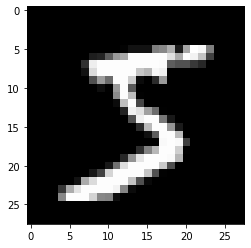

In [52]:
#2. Write a function that can shift an MNIST image in any direction (left, right, up,
#or down) by one pixel.5 Then, for each image in the training set, create four shif‐
#ted copies (one per direction) and add them to the training set. Finally, train your
#best model on this expanded training set and measure its accuracy on the test set.
#You should observe that your model performs even better now! This technique of
#artificially growing the training set is called data augmentation or training set
#expansion.

#Original
some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.gray()
plt.show()

<Figure size 432x288 with 0 Axes>

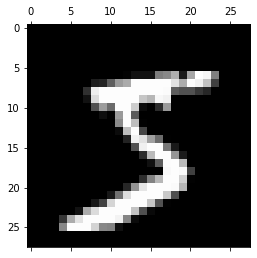

In [60]:
#One Pixel Down:
down = np.roll(some_digit_image, 1, axis=0)
plt.gray()
plt.matshow(down)
plt.show()

<Figure size 432x288 with 0 Axes>

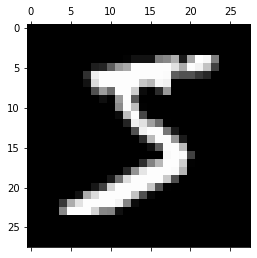

In [61]:
#One Pixel Up:
up = np.roll(some_digit_image, -1, axis=0)
plt.gray()
plt.matshow(up)
plt.show()

<Figure size 432x288 with 0 Axes>

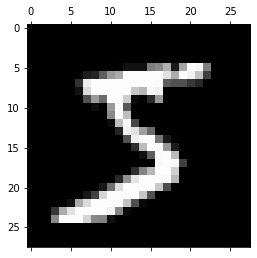

In [63]:
#One Pixel Left:
left = np.roll(some_digit_image, -1, axis=1)
plt.gray()
plt.matshow(left)
plt.show()

<Figure size 432x288 with 0 Axes>

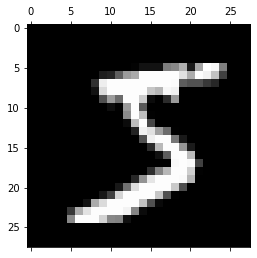

In [64]:
#One Pixel Right:
right = np.roll(some_digit_image, 1, axis=1)
plt.gray()
plt.matshow(right)
plt.show()

In [65]:
X_augmented = [left, right]
Y_augmented = [up, down]
knn_clf.fit(X_augmented, Y_augmented)

ValueError: Found array with dim 3. KNeighborsClassifier expected <= 2.